# Programming in Julia for the Digital Humanities

## Part I - Session 2

### Remembering "Introduction to Julia in Digital Sciences & Humanities"
Topics for this session:

- DelimitedFiles
- CSV
- DataFrames
- Plots

### Check installed packages

In [1]:
]status

Status `~/.julia/environments/v1.10/Project.toml`
  [336ed68f] CSV v0.10.12
  [a93c6f00] DataFrames v1.6.1
  [8bb1440f] DelimitedFiles v1.9.1
  [7073ff75] IJulia v1.24.2
  [91a5bcdd] Plots v1.40.0


## Used packages

In [2]:
using DelimitedFiles
using CSV
using DataFrames
using Plots

### DelimitedFiles

In order to access the data within files, one of the standard packages `DelimitedFiles` allows reading files of any format (`csv`, `tsv`, `xlsx`, `txt`, etc...) - see https://docs.julialang.org/en/v1/stdlib/DelimitedFiles.

Use `readdlm()` to read the `pyramids.csv` file like:

In [3]:
readdlm("pyramids.csv")

62×6 Matrix{Any}:
 "Name,Dynasty,Base1"  "(m),Base2"              …  ""    ""
 "Step"                "Pyramid"                   ""    ""
 "Buried"              "Pyramid,3,120,120,70"      ""    ""
 "Layer"               "Pyramid,3,84,84,40"        ""    ""
 "Pyramid"             "Lepsius"                   ""    ""
 "Pyramid"             "of"                     …  ""    ""
 "Pyramid"             "of"                        ""    ""
 "Edfu"                "South"                     ""    ""
 "Al"                  "Kula"                      ""    ""
 "Pyramid"             "of"                        "of"  "Ombos),3,19,19,14"
 "Pyramid"             "of"                     …  ""    ""
 "Pyramid"             "of"                        ""    ""
 "Pyramid"             "of"                        ""    ""
 ⋮                                              ⋱        ⋮
 "White"               "Pyramid,12,50,50,84"    …  ""    ""
 "Pyramid"             "of"                        ""    ""
 "Pyra

`readdlm()` attempts to read the file as best as it can, however, we must input more arguments.

From `? readdlm()`, the arguments are as follows (only the source is mandatory):

```julia
readdlm(source, delim::AbstractChar, T::Type, eol::AbstractChar; header=false, skipstart=0, skipblanks=true, use_mmap, quotes=true, dims, comments=false, comment_char='#')

```

In this case, we must add a delimiter argument as `,` and set header as `true`. Note that for type `Char`, the character must be between single quotes `'`.

In [4]:
pyramids, header = readdlm("pyramids.csv", ',', header=true)

(Any["Step Pyramid of Djoser" 3 … 109 60; "Buried Pyramid" 3 … 120 70; … ; "Tomb S9" 13 … 60 ""; "Tomb S10" 13 … 30 ""], AbstractString["Name" "Dynasty" … "Base2 (m)" "Height (m)"])

In [5]:
header

1×5 Matrix{AbstractString}:
 "Name"  "Dynasty"  "Base1 (m)"  "Base2 (m)"  "Height (m)"

In [6]:
pyramids

61×5 Matrix{Any}:
 "Step Pyramid of Djoser"                 3  121     109      60
 "Buried Pyramid"                         3  120     120      70
 "Layer Pyramid"                          3   84      84      40
 "Pyramid Lepsius I"                      3  215     215     145
 "Pyramid of Athribis"                    3   20      20      16
 "Pyramid of Elephantine"                 3   18      18      10.5
 "Edfu South Pyramid"                     3   18      18      12.5
 "Al Kula Pyramid"                        3   19      19      12
 "Pyramid of Naqada (Pyramid of Ombos)"   3   19      19      14
 "Pyramid of Sinki"                       3   19      19      12.5
 "Pyramid of Zawyet el-Maiyitin"          3   22.4    22.4    17
 "Pyramid of Seila"                       4   25      25       6.8
 "Pyramid of Meidum"                      4  144     144      92
 ⋮                                                           
 "White Pyramid"                         12   50      50      84
 "

The data can be accessed between `[]` brackets with coordinates separated by a comma `,` indicating row and column.

Instead of a number, the colon symbol `:` alone indicates the entire column or row.

```julia
data[:, column_index]
data[row_index, :]

```

In [7]:
pyramids[:, 1]

61-element Vector{Any}:
 "Step Pyramid of Djoser"
 "Buried Pyramid"
 "Layer Pyramid"
 "Pyramid Lepsius I"
 "Pyramid of Athribis"
 "Pyramid of Elephantine"
 "Edfu South Pyramid"
 "Al Kula Pyramid"
 "Pyramid of Naqada (Pyramid of Ombos)"
 "Pyramid of Sinki"
 "Pyramid of Zawyet el-Maiyitin"
 "Pyramid of Seila"
 "Pyramid of Meidum"
 ⋮
 "White Pyramid"
 "Pyramid of Senusret II"
 "Pyramid of Senusret III"
 "Black Pyramid"
 "Pyramid of Hawara"
 "Southern Mazghuna pyramid"
 "Northern Mazghuna pyramid"
 "Pyramid of Ameny Qemau"
 "Pyramid of Khendjer"
 "Southern South Saqqara pyramid"
 "Tomb S9"
 "Tomb S10"

In [8]:
pyramids[1, :]

5-element Vector{Any}:
    "Step Pyramid of Djoser"
   3
 121
 109
  60

For a specific range you can have, for example:

```julia
data[3:5, :]
data[:, 1:2]

```

In [9]:
pyramids[3:5, :]

3×5 Matrix{Any}:
 "Layer Pyramid"        3   84   84   40
 "Pyramid Lepsius I"    3  215  215  145
 "Pyramid of Athribis"  3   20   20   16

In [10]:
pyramids[:, 1:2]

61×2 Matrix{Any}:
 "Step Pyramid of Djoser"                 3
 "Buried Pyramid"                         3
 "Layer Pyramid"                          3
 "Pyramid Lepsius I"                      3
 "Pyramid of Athribis"                    3
 "Pyramid of Elephantine"                 3
 "Edfu South Pyramid"                     3
 "Al Kula Pyramid"                        3
 "Pyramid of Naqada (Pyramid of Ombos)"   3
 "Pyramid of Sinki"                       3
 "Pyramid of Zawyet el-Maiyitin"          3
 "Pyramid of Seila"                       4
 "Pyramid of Meidum"                      4
 ⋮                                       
 "White Pyramid"                         12
 "Pyramid of Senusret II"                12
 "Pyramid of Senusret III"               12
 "Black Pyramid"                         12
 "Pyramid of Hawara"                     12
 "Southern Mazghuna pyramid"             13
 "Northern Mazghuna pyramid"             13
 "Pyramid of Ameny Qemau"                13
 "Pyramid of Khe

In [11]:
pyramids[:, [1, 5]]

61×2 Matrix{Any}:
 "Step Pyramid of Djoser"                 60
 "Buried Pyramid"                         70
 "Layer Pyramid"                          40
 "Pyramid Lepsius I"                     145
 "Pyramid of Athribis"                    16
 "Pyramid of Elephantine"                 10.5
 "Edfu South Pyramid"                     12.5
 "Al Kula Pyramid"                        12
 "Pyramid of Naqada (Pyramid of Ombos)"   14
 "Pyramid of Sinki"                       12.5
 "Pyramid of Zawyet el-Maiyitin"          17
 "Pyramid of Seila"                        6.8
 "Pyramid of Meidum"                      92
 ⋮                                       
 "White Pyramid"                          84
 "Pyramid of Senusret II"                 48.6
 "Pyramid of Senusret III"                63
 "Black Pyramid"                          75
 "Pyramid of Hawara"                      58
 "Southern Mazghuna pyramid"                ""
 "Northern Mazghuna pyramid"                ""
 "Pyramid of Ameny Qemau" 

### Exercise 1 - Adding rows and columns

To add a new row, you can use either `vcat()`

```julia
data = vcat(data, new_row)
```

Or

```julia
data = [data; new_row]

```

Where `new_row` is a horizontal array - elements separated by spaces.


1.1. Add the following pyramid to `pyramids`

| Name             | Dynasty | Base1 (m) | Base2 (m) | Height (m) |
|------------------|---------|-----------|-----------|------------|
| Pyramid of Ahmose | 18      | 52.5      | 52.5      | 40         |


In [12]:
new_row = ["Pyramid of Ahmose" 18 52.5 52.5 40]

1×5 Matrix{Any}:
 "Pyramid of Ahmose"  18  52.5  52.5  40

In [13]:
pyramids = [pyramids; new_row]

#Or
#pyramids = vcat(pyramids, new_row)

62×5 Matrix{Any}:
 "Step Pyramid of Djoser"                 3  121     109      60
 "Buried Pyramid"                         3  120     120      70
 "Layer Pyramid"                          3   84      84      40
 "Pyramid Lepsius I"                      3  215     215     145
 "Pyramid of Athribis"                    3   20      20      16
 "Pyramid of Elephantine"                 3   18      18      10.5
 "Edfu South Pyramid"                     3   18      18      12.5
 "Al Kula Pyramid"                        3   19      19      12
 "Pyramid of Naqada (Pyramid of Ombos)"   3   19      19      14
 "Pyramid of Sinki"                       3   19      19      12.5
 "Pyramid of Zawyet el-Maiyitin"          3   22.4    22.4    17
 "Pyramid of Seila"                       4   25      25       6.8
 "Pyramid of Meidum"                      4  144     144      92
 ⋮                                                           
 "Pyramid of Senusret II"                12  106     106      48.6


For a new column, `hcat()` (horizontal concatenation) can be used

```julia
data = hcat(data, new_column)
```

Or

```julia
data = [data new_column]
```

Where `new_column` is a vertical array - elements separated by `,` or `;`.

1.2. Add a new column named "Base area (m^2)" to `header`.

In [14]:
header = [header "Base area (m^2)"]
#Or
#header = hcat(header, "Base area (m^2)")

1×6 Matrix{AbstractString}:
 "Name"  "Dynasty"  "Base1 (m)"  "Base2 (m)"  "Height (m)"  "Base area (m^2)"

1.3. Add the following `base_area` as a column to `pyramids`.

In [15]:
base_area = pyramids[:, 3] .* pyramids[:, 4]

62-element Vector{Real}:
 13189
 14400
  7056
 46225
   400
   324
   324
   361
   361
   361
   501.75999999999993
   625
 20736
     ⋮
 11236
 11025
 11025
 11025
  2756.25
  2756.25
  2704
  2756.25
  6201.5625
  2700
  1200
  2756.25

In [16]:
pyramids = [pyramids base_area]
#Or
#pyramids = hcat(pyramids, base_area)

62×6 Matrix{Any}:
 "Step Pyramid of Djoser"                 3  121     109      60     13189
 "Buried Pyramid"                         3  120     120      70     14400
 "Layer Pyramid"                          3   84      84      40      7056
 "Pyramid Lepsius I"                      3  215     215     145     46225
 "Pyramid of Athribis"                    3   20      20      16       400
 "Pyramid of Elephantine"                 3   18      18      10.5     324
 "Edfu South Pyramid"                     3   18      18      12.5     324
 "Al Kula Pyramid"                        3   19      19      12       361
 "Pyramid of Naqada (Pyramid of Ombos)"   3   19      19      14       361
 "Pyramid of Sinki"                       3   19      19      12.5     361
 "Pyramid of Zawyet el-Maiyitin"          3   22.4    22.4    17       501.76
 "Pyramid of Seila"                       4   25      25       6.8     625
 "Pyramid of Meidum"                      4  144     144      92     20736
 ⋮  

Finally, you can use `writedlm()` to write to a text file with:

```julia
writedlm(file_path, [header; data], delimiter)
```

1.4. Overwrite the `pyramids.csv` file with the updated data.

In [17]:
writedlm("pyramids.csv", [header; pyramids], ',')

## CSV

[CSV.jl](https://csv.juliadata.org/stable/index.html) is the most common method of loading `csv` and `tsv` files into Julia.

This loading method is simpler (and quicker) than `DelimitedFiles` since `DelimitedFiles` should only be used when dealing with files that require many specifications or changes.

The most commonly used function is the `CSV.File()`. This returns a `CSV.File` object.

In [18]:
pyramids = CSV.File("pyramids.csv")

62-element CSV.File:
 CSV.Row: (Name = "Step Pyramid of Djoser", Dynasty = 3, var"Base1 (m)" = 121.0, var"Base2 (m)" = 109.0, var"Height (m)" = 60.0, var"Base area (m^2)" = 13189.0)
 CSV.Row: (Name = "Buried Pyramid", Dynasty = 3, var"Base1 (m)" = 120.0, var"Base2 (m)" = 120.0, var"Height (m)" = 70.0, var"Base area (m^2)" = 14400.0)
 CSV.Row: (Name = "Layer Pyramid", Dynasty = 3, var"Base1 (m)" = 84.0, var"Base2 (m)" = 84.0, var"Height (m)" = 40.0, var"Base area (m^2)" = 7056.0)
 CSV.Row: (Name = "Pyramid Lepsius I", Dynasty = 3, var"Base1 (m)" = 215.0, var"Base2 (m)" = 215.0, var"Height (m)" = 145.0, var"Base area (m^2)" = 46225.0)
 CSV.Row: (Name = "Pyramid of Athribis", Dynasty = 3, var"Base1 (m)" = 20.0, var"Base2 (m)" = 20.0, var"Height (m)" = 16.0, var"Base area (m^2)" = 400.0)
 CSV.Row: (Name = "Pyramid of Elephantine", Dynasty = 3, var"Base1 (m)" = 18.0, var"Base2 (m)" = 18.0, var"Height (m)" = 10.5, var"Base area (m^2)" = 324.0)
 CSV.Row: (Name = "Edfu South Pyramid", Dynasty 

This data is accessable with `[]` brackets containing indexes or ranges.

```julia
data[row_index]
data[row_index][column_index]
```

A `CSV.File` object contains properties with the name of the columns and can be accessed with `.` (use `TAB` for autocompletion help). 

```julia
data.column_name
data[row_index].column_name
data.column_name[row_index]
```

In [19]:
pyramids[1][end]

13189.0

In [20]:
pyramids.var"Base area (m^2)"[1]

13189.0

In [21]:
pyramids[1].var"Base area (m^2)"

13189.0

## DataFrames

To edit the contents of a `CSV.File()` object, convert it into a DataFrame from the `DataFrames` package.

This conversion can be done with piping (the pipe operator `|>`).

```julia
pyramids = CSV.File("pyramids.csv") |> DataFrame
```

An alternative is with `CSV.read()`.

```julia
pyramids = CSV.read("pyramids.csv", DataFrame)
```

In [22]:
pyramids = CSV.File("pyramids.csv") |> DataFrame
#Or
#pyramids = CSV.read("pyramids.csv", DataFrame)

62×6 DataFrame
 Row │ Name                               Dynasty  Base1 (m)  Base2 (m)  Heigh ⋯
     │ String                             Int64    Float64    Float64    Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Step Pyramid of Djoser                   3     121.0      109.0         ⋯
   2 │ Buried Pyramid                           3     120.0      120.0
   3 │ Layer Pyramid                            3      84.0       84.0
   4 │ Pyramid Lepsius I                        3     215.0      215.0       1
   5 │ Pyramid of Athribis                      3      20.0       20.0         ⋯
   6 │ Pyramid of Elephantine                   3      18.0       18.0
   7 │ Edfu South Pyramid                       3      18.0       18.0
   8 │ Al Kula Pyramid                          3      19.0       19.0
   9 │ Pyramid of Naqada (Pyramid of Om…        3      19.0       19.0         ⋯
  10 │ Pyramid of Sinki                         3      19.0       19.0
  11 │ Pyramid of Zawyet el-Maiyitin            3      22.4       22.4
  ⋮  │                 ⋮                     ⋮         ⋮          ⋮          ⋮ ⋱
  53 │ Black Pyramid                           12     105.0      105.0
  54 │ Pyramid of Hawara                       12     105.0      105.0         ⋯
  55 │ Southern Mazghuna pyramid               13      52.5       52.5   missi
  56 │ Northern Mazghuna pyramid               13      52.5       52.5   missi
  57 │ Pyramid of Ameny Qemau                  13      52.0       52.0
  58 │ Pyramid of Khendjer                     13      52.5       52.5         ⋯
  59 │ Southern South Saqqara pyramid          13      78.75      78.75  missi
  60 │ Tomb S9                                 13      45.0       60.0   missi
  61 │ Tomb S10                                13      40.0       30.0   missi
  62 │ Pyramid of Ahmose                       18      52.5       52.5         ⋯
                                                   2 columns and 41 rows omitted

The functions `names()` and `propertynames()` show the properties available.

In [23]:
names(pyramids)

6-element Vector{String}:
 "Name"
 "Dynasty"
 "Base1 (m)"
 "Base2 (m)"
 "Height (m)"
 "Base area (m^2)"

In [24]:
propertynames(pyramids)

6-element Vector{Symbol}:
 :Name
 :Dynasty
 Symbol("Base1 (m)")
 Symbol("Base2 (m)")
 Symbol("Height (m)")
 Symbol("Base area (m^2)")

### Selecting columns

There are many possibilities to obtain column data.

For a specific column:

```julia
pyramids.Name
pyramids.:Name
pyramids."Name"
pyramids[:, :Name]
pyramids[:, "Name"]
pyramids[:, 1]
pyramids[!, :Name]
pyramids[!, "Name"]
pyramids[!, 1]

```

In [25]:
pyramids.Name

62-element Vector{String}:
 "Step Pyramid of Djoser"
 "Buried Pyramid"
 "Layer Pyramid"
 "Pyramid Lepsius I"
 "Pyramid of Athribis"
 "Pyramid of Elephantine"
 "Edfu South Pyramid"
 "Al Kula Pyramid"
 "Pyramid of Naqada (Pyramid of Ombos)"
 "Pyramid of Sinki"
 "Pyramid of Zawyet el-Maiyitin"
 "Pyramid of Seila"
 "Pyramid of Meidum"
 ⋮
 "Pyramid of Senusret II"
 "Pyramid of Senusret III"
 "Black Pyramid"
 "Pyramid of Hawara"
 "Southern Mazghuna pyramid"
 "Northern Mazghuna pyramid"
 "Pyramid of Ameny Qemau"
 "Pyramid of Khendjer"
 "Southern South Saqqara pyramid"
 "Tomb S9"
 "Tomb S10"
 "Pyramid of Ahmose"

For multiple columns:

```julia
pyramids[:, ["Name", "Height (m)"]]
pyramids[:, [:Name, :Dynasty]]
pyramids[:, [1, 4]]
pyramids[:, 1:4]]
pyramids[:, Between("Name", "Base2 (m)")]
```

In [26]:
pyramids[:, ["Name", "Height (m)"]]

62×2 DataFrame
 Row │ Name                               Height (m) 
     │ String                             Float64?   
─────┼───────────────────────────────────────────────
   1 │ Step Pyramid of Djoser                  60.0
   2 │ Buried Pyramid                          70.0
   3 │ Layer Pyramid                           40.0
   4 │ Pyramid Lepsius I                      145.0
   5 │ Pyramid of Athribis                     16.0
   6 │ Pyramid of Elephantine                  10.5
   7 │ Edfu South Pyramid                      12.5
   8 │ Al Kula Pyramid                         12.0
   9 │ Pyramid of Naqada (Pyramid of Om…       14.0
  10 │ Pyramid of Sinki                        12.5
  11 │ Pyramid of Zawyet el-Maiyitin           17.0
  ⋮  │                 ⋮                      ⋮
  53 │ Black Pyramid                           75.0
  54 │ Pyramid of Hawara                       58.0
  55 │ Southern Mazghuna pyramid          missing    
  56 │ Northern Mazghuna pyramid          missing    
  57 │ Pyramid of Ameny Qemau                  35.0
  58 │ Pyramid of Khendjer                     37.35
  59 │ Southern South Saqqara pyramid     missing    
  60 │ Tomb S9                            missing    
  61 │ Tomb S10                           missing    
  62 │ Pyramid of Ahmose                       40.0
                                      41 rows omitted

The `select()` and `select!()` functions also do the same as the examples above:

```julia
new_pyramids = select(pyramids, ["Name", "Height (m)"])
select!(pyramids, ["Name", "Height (m)"])
```

In [27]:
select(pyramids, ["Name", "Height (m)"])

62×2 DataFrame
 Row │ Name                               Height (m) 
     │ String                             Float64?   
─────┼───────────────────────────────────────────────
   1 │ Step Pyramid of Djoser                  60.0
   2 │ Buried Pyramid                          70.0
   3 │ Layer Pyramid                           40.0
   4 │ Pyramid Lepsius I                      145.0
   5 │ Pyramid of Athribis                     16.0
   6 │ Pyramid of Elephantine                  10.5
   7 │ Edfu South Pyramid                      12.5
   8 │ Al Kula Pyramid                         12.0
   9 │ Pyramid of Naqada (Pyramid of Om…       14.0
  10 │ Pyramid of Sinki                        12.5
  11 │ Pyramid of Zawyet el-Maiyitin           17.0
  ⋮  │                 ⋮                      ⋮
  53 │ Black Pyramid                           75.0
  54 │ Pyramid of Hawara                       58.0
  55 │ Southern Mazghuna pyramid          missing    
  56 │ Northern Mazghuna pyramid          missing    
  57 │ Pyramid of Ameny Qemau                  35.0
  58 │ Pyramid of Khendjer                     37.35
  59 │ Southern South Saqqara pyramid     missing    
  60 │ Tomb S9                            missing    
  61 │ Tomb S10                           missing    
  62 │ Pyramid of Ahmose                       40.0
                                      41 rows omitted

With these methods, you can reorder the columns of a `DataFrame`, simply input an array with the new column order.

### Exercise 2 - Reordering columns

2.1. Reorder the `DataFrame` `pyramids` so that the base area is the 5th column.

In [28]:
columns = names(pyramids)

6-element Vector{String}:
 "Name"
 "Dynasty"
 "Base1 (m)"
 "Base2 (m)"
 "Height (m)"
 "Base area (m^2)"

In [29]:
columns[5], columns[end] = columns[end], columns[5]

("Base area (m^2)", "Height (m)")

In [30]:
select!(pyramids, columns)

62×6 DataFrame
 Row │ Name                               Dynasty  Base1 (m)  Base2 (m)  Base  ⋯
     │ String                             Int64    Float64    Float64    Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Step Pyramid of Djoser                   3     121.0      109.0         ⋯
   2 │ Buried Pyramid                           3     120.0      120.0
   3 │ Layer Pyramid                            3      84.0       84.0
   4 │ Pyramid Lepsius I                        3     215.0      215.0
   5 │ Pyramid of Athribis                      3      20.0       20.0         ⋯
   6 │ Pyramid of Elephantine                   3      18.0       18.0
   7 │ Edfu South Pyramid                       3      18.0       18.0
   8 │ Al Kula Pyramid                          3      19.0       19.0
   9 │ Pyramid of Naqada (Pyramid of Om…        3      19.0       19.0         ⋯
  10 │ Pyramid of Sinki                         3      19.0       19.0
  11 │ Pyramid of Zawyet el-Maiyitin            3      22.4       22.4
  ⋮  │                 ⋮                     ⋮         ⋮          ⋮            ⋱
  53 │ Black Pyramid                           12     105.0      105.0
  54 │ Pyramid of Hawara                       12     105.0      105.0         ⋯
  55 │ Southern Mazghuna pyramid               13      52.5       52.5
  56 │ Northern Mazghuna pyramid               13      52.5       52.5
  57 │ Pyramid of Ameny Qemau                  13      52.0       52.0
  58 │ Pyramid of Khendjer                     13      52.5       52.5         ⋯
  59 │ Southern South Saqqara pyramid          13      78.75      78.75
  60 │ Tomb S9                                 13      45.0       60.0
  61 │ Tomb S10                                13      40.0       30.0
  62 │ Pyramid of Ahmose                       18      52.5       52.5         ⋯
                                                   2 columns and 41 rows omitted

2.2. Export data with `CSV.write()`

```julia
CSV.write(file, data)
```

In [31]:
CSV.write("pyramids.csv", pyramids)

"pyramids.csv"

### Exercise 3 - Creating and manipulating a `DataFrame`

You can generate a new `DataFrame` with the `DataFrame()` constructor, for example:

```julia
empty_dataframe = DataFrame()
```

Column names and their contents can be passed into the constructor like so:

```julia
grades = DataFrame(Name = ["John", "Maria"], Test_1 = [16, 19], Test_2 = [14, 19])
```

3.1. Generate any `DataFrame` you wish.

In [32]:
grades = DataFrame(Name = ["John", "Maria"], Test_1 = [16, 19], Test_2 = [14, 19])

2×3 DataFrame
 Row │ Name    Test_1  Test_2 
     │ String  Int64   Int64  
─────┼────────────────────────
   1 │ John        16      14
   2 │ Maria       19      19

3.2. Add a new row with `push!()` (for example, a new student).

In [33]:
push!(grades, ["Mark", 20, 20])

3×3 DataFrame
 Row │ Name    Test_1  Test_2 
     │ String  Int64   Int64  
─────┼────────────────────────
   1 │ John        16      14
   2 │ Maria       19      19
   3 │ Mark        20      20

3.3. Add a new column to your `DataFrame` (for example, another test).

There are three possible ways to add a new column.

By using `[]` brackets:

```julia
df[!, :new_column] = new_array
df[!, "new_column"] = new_array
```

By adding a new property to the `DataFrame` with `.`:

```julia
df.new_column = new_array
df.:new_column = new_array
df."new_column" = new_array
```

And by using `hcat()`:

```julia
df = hcat(df, new_array)
```

Note that `hcat()` generates the column name by itself.

In [34]:
test_3 = [12, 15, 20]

3-element Vector{Int64}:
 12
 15
 20

In [35]:
grades[!, "Test_3"] = test_3

3-element Vector{Int64}:
 12
 15
 20

The `rename()` and `rename!()` functions allow for renaming columns.

To rename a specific column, you can do:

```julia
rename!(grades, :Name => :Student)
rename!(grades, "Name" => "Student")

```

To rename all columns, the second argument must be an array:

```julia
rename!(grades, ["Student", "Math", "History", "Music"])
```

3.4. Rename your columns as you wish.

In [36]:
rename!(grades, "Name" => "Student")

3×4 DataFrame
 Row │ Student  Test_1  Test_2  Test_3 
     │ String   Int64   Int64   Int64  
─────┼─────────────────────────────────
   1 │ John         16      14      12
   2 │ Maria        19      19      15
   3 │ Mark         20      20      20

In [37]:
rename!(grades, ["Student", "Math", "History", "Music"])

3×4 DataFrame
 Row │ Student  Math   History  Music 
     │ String   Int64  Int64    Int64 
─────┼────────────────────────────────
   1 │ John        16       14     12
   2 │ Maria       19       19     15
   3 │ Mark        20       20     20

### `DataFrame` statistics

A quick and simple way to obtain information of a `DataFrame` is with the `describe()` function.

You can also use `maximum()` or `minimum()` with data rows or columns.

In [38]:
describe(grades)

4×7 DataFrame
 Row │ variable  mean     min   median  max   nmissing  eltype   
     │ Symbol    Union…   Any   Union…  Any   Int64     DataType 
─────┼───────────────────────────────────────────────────────────
   1 │ Student            John          Mark         0  String
   2 │ Math      18.3333  16    19.0    20           0  Int64
   3 │ History   17.6667  14    19.0    20           0  Int64
   4 │ Music     15.6667  12    15.0    20           0  Int64

In [39]:
maximum(grades.Math)

20

### Converting between Matrix and DataFrame

You can transform a `DataFrame` into a `Matrix` and vice-versa with `DataFrame()` and `Matrix()` constructors.

```julia
grades_matrix = Matrix(grades)
DataFrame(grades_matrix, :auto) # Automatically generates column names
DataFrame(grades_matrix, column_names_array)
```

In [40]:
grades_matrix = Matrix(grades)

3×4 Matrix{Any}:
 "John"   16  14  12
 "Maria"  19  19  15
 "Mark"   20  20  20

In [41]:
DataFrame(grades_matrix, :auto)

3×4 DataFrame
 Row │ x1     x2   x3   x4  
     │ Any    Any  Any  Any 
─────┼──────────────────────
   1 │ John   16   14   12
   2 │ Maria  19   19   15
   3 │ Mark   20   20   20

## Plots

[Plots.jl](https://docs.juliaplots.org/stable/) allows for multiple backends with different features, pros, and cons. They represent different ways to plot in Julia.

### GR

`GR` backend is the default backend. It is usually quicker over a variety of plot types. Run `gr()`.

In [42]:
gr()

Plots.GRBackend()

Load the `lodging_income.csv` file into a `DataFrame` variable and transpose the table (add the `transpose` argument equal to `true`).

In [43]:
income = CSV.File("lodging_income.csv", transpose=true) |> DataFrame
#Or
#income = CSV.read("lodging_income.csv", DataFrame, transpose=true)

12×2 DataFrame
 Row │ Year   Income  
     │ Int64  Float64 
─────┼────────────────
   1 │  2009    149.1
   2 │  2010    140.4
   3 │  2011    147.5
   4 │  2012    155.0
   5 │  2013    157.8
   6 │  2014    157.2
   7 │  2015    163.5
   8 │  2016    168.3
   9 │  2017    169.3
  10 │  2018    173.9
  11 │  2019    180.4
  12 │  2020    162.9

`lodging_income.csv` contains the average lodging income in Euro per guest in Madeira.

`scatter()` generates a scatter plot where:

```julia
scatter(df.X, df.Y)

```

For example:

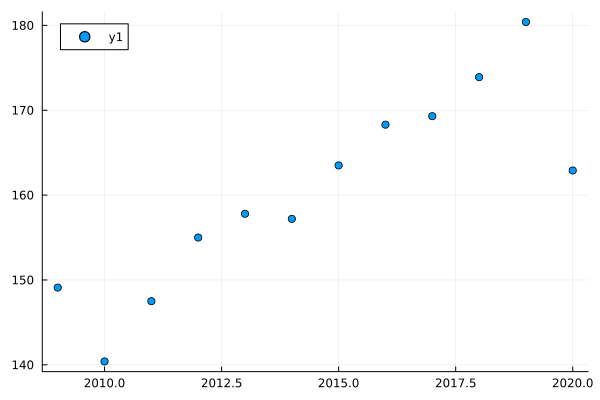

In [44]:
scatter(income.Year, income.Income)

Let us remove the label, change the marker shape and color.

`income_plot` will be used later.

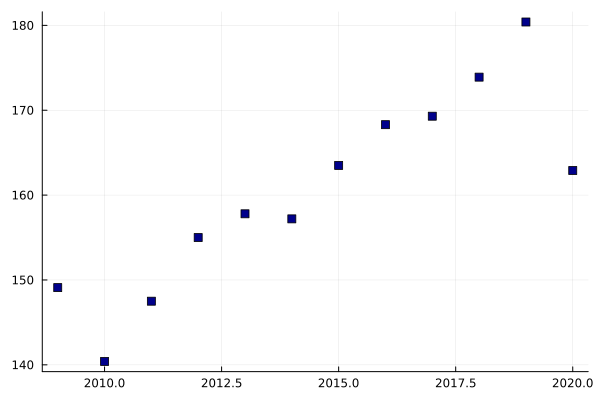

In [45]:
income_plot = scatter(income.Year, income.Income, label="", marker=:square, color=:blue4)

You can also use `plot()` or `bar()` to instead plot either line plot or a bar plot, respectively.

The `!` symbol updates an existing plot.

Let us add a dashed line over the scatter plot with `plot!()` and `linestyle=:dash`.

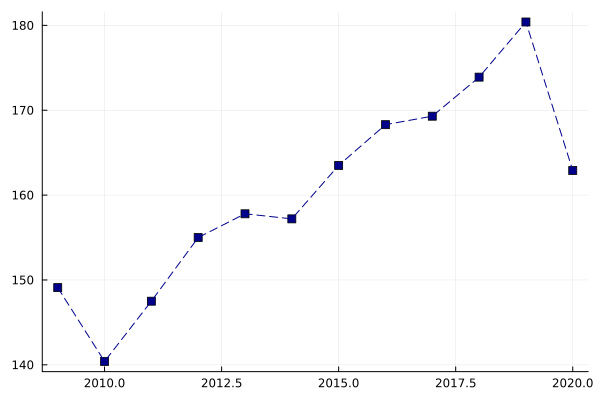

In [46]:
plot!(income.Year, income.Income, label="", color=:blue4, linestyle=:dash)

Add a title with `title!()`.

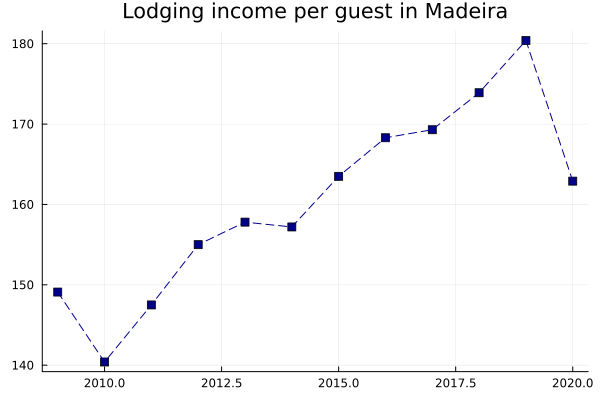

In [47]:
title!("Lodging income per guest in Madeira")

Add labels to the x and y axis with `xlabel!()` and `ylabel!()` respectively.

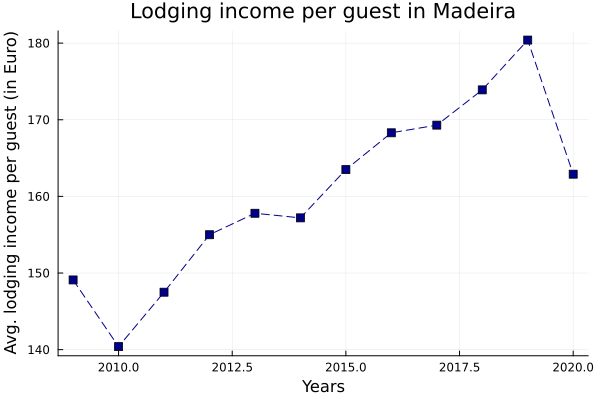

In [48]:
xlabel!("Years")
ylabel!("Avg. lodging income per guest (in Euro)")

The functions `xaxis!()` and `yaxis!()` allows for axis editing.

Example:

```julia
yaxis!((0, 200))
xaxis!((2008, 2021), 2009:2020) # or 2009:1:2020

```

The first argument represents the range displayed in the plot, the second argument represents the ticks in the axis (in this case, a tick on each year between 2009 and 2020). For a tick every two years, you could have `2009:2:2020`.

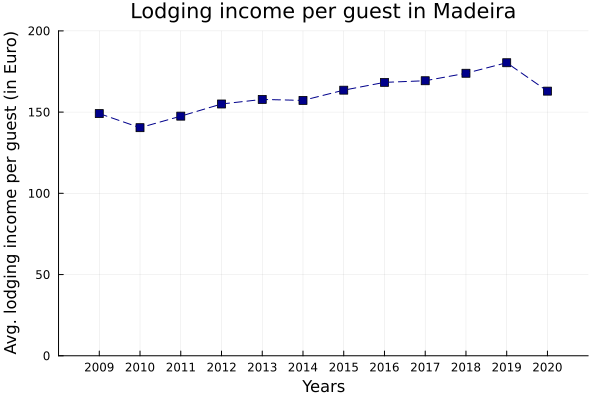

In [49]:
yaxis!((0, 200))
xaxis!((2008, 2021), 2009:2020)

If ever needed, you can add arguments like `:log`, `:flip` or `font()` to the axis' functions in order to change the scale, flip the axis, or change the font.

For more info, check: https://docs.juliaplots.org/stable/.

### Exercise 4 - Plotting

With `average_stay.csv`, plot the average stay of both foreign and Portuguese guests in the Autonomous Region of Madeira over the years.

For example:

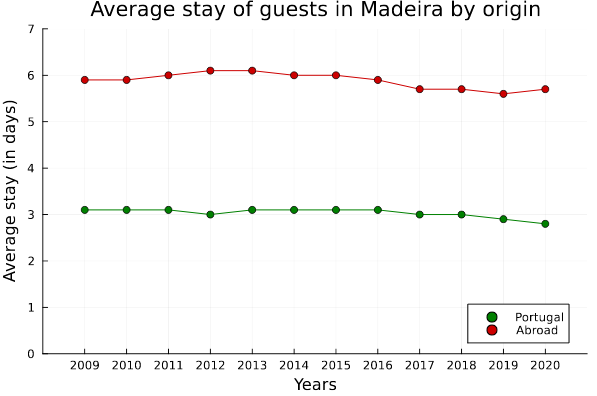

4.1. Load the file into a `DataFrame` variable. Again, you should transpose the table.

In [50]:
avg_stay = CSV.File("average_stay.csv", transpose=true) |> DataFrame
#Or
#avg_stay = CSV.read("average_stay.csv", DataFrame, transpose=true)

12×4 DataFrame
 Row │ Year   Total    Portugal  Abroad  
     │ Int64  Float64  Float64   Float64 
─────┼───────────────────────────────────
   1 │  2009      5.2       3.1      5.9
   2 │  2010      5.1       3.1      5.9
   3 │  2011      5.4       3.1      6.0
   4 │  2012      5.5       3.0      6.1
   5 │  2013      5.6       3.1      6.1
   6 │  2014      5.5       3.1      6.0
   7 │  2015      5.4       3.1      6.0
   8 │  2016      5.4       3.1      5.9
   9 │  2017      5.2       3.0      5.7
  10 │  2018      5.2       3.0      5.7
  11 │  2019      5.0       2.9      5.6
  12 │  2020      4.7       2.8      5.7

4.2. Assign a plot to `avg_stay_plot`.

Start with a `scatter()` plot, followed by a simple line plot with `plot!()` of the Portuguese guests.

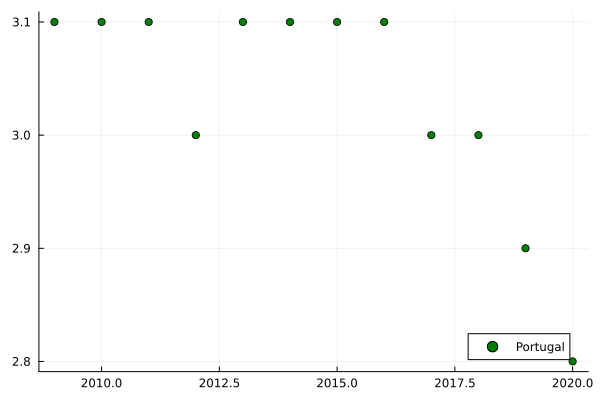

In [51]:
avg_stay_plot = scatter(avg_stay.Year, avg_stay.Portugal, marker=:green, label="Portugal", legend=:bottomright)

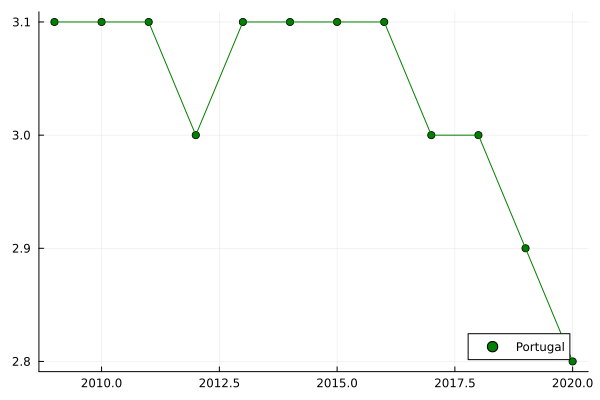

In [52]:
plot!(avg_stay.Year, avg_stay.Portugal, color=:green, label="")

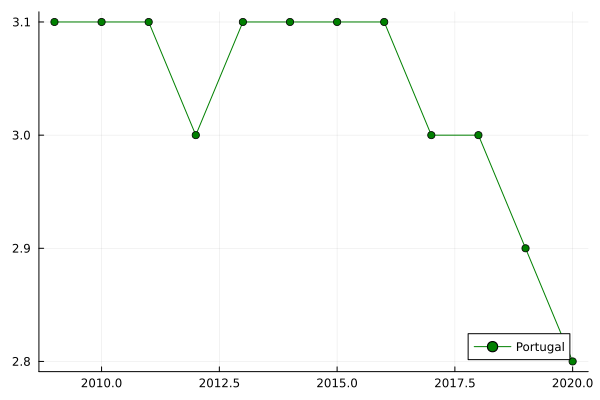

In [53]:
#Or
avg_stay_plot = plot(avg_stay.Year, avg_stay.Portugal, marker=:green, color=:green, label="Portugal", legend=:bottomright)

4.3. Update the plot above with a scatter and line plot of guests from abroad.

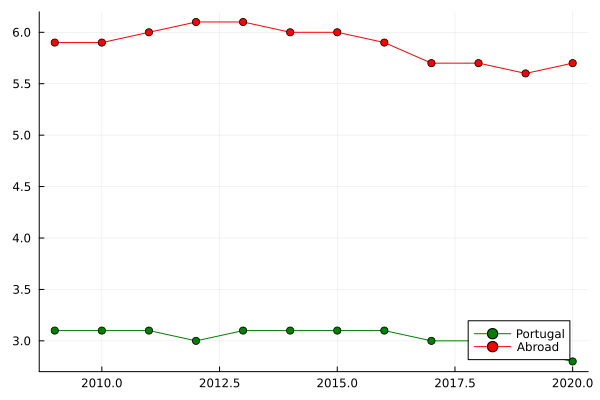

In [54]:
plot!(avg_stay.Year, avg_stay.Abroad, marker=:red, color=:red, label="Abroad")

In [55]:
# Or
#scatter!(avg_stay.Year, avg_stay.Abroad, marker=:red, label="Abroad")

In [56]:
# Or
#plot!(avg_stay.Year, avg_stay.Abroad, color=:red, label="")

4.4. Add a title with `title!()` and axis labels with `xlabel!()` and `ylabel!()`

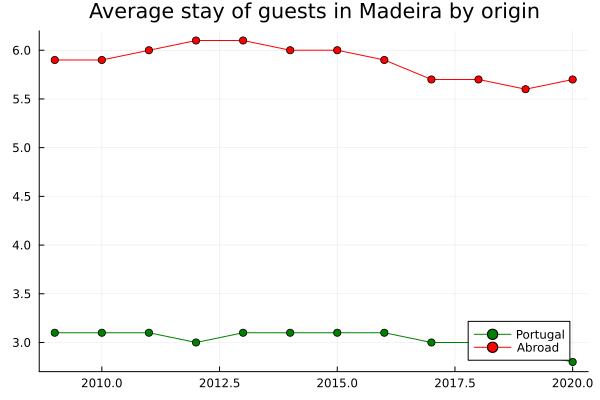

In [57]:
title!("Average stay of guests in Madeira by origin")

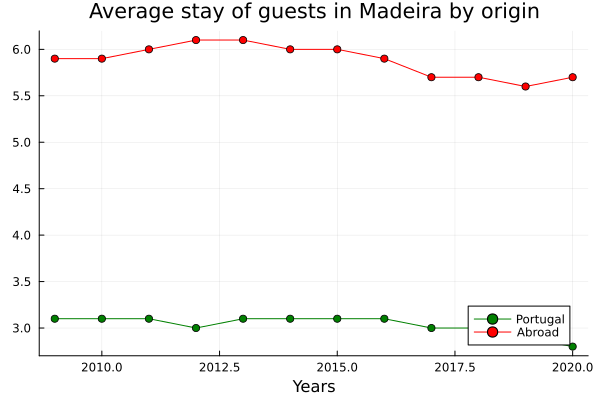

In [58]:
xlabel!("Years")

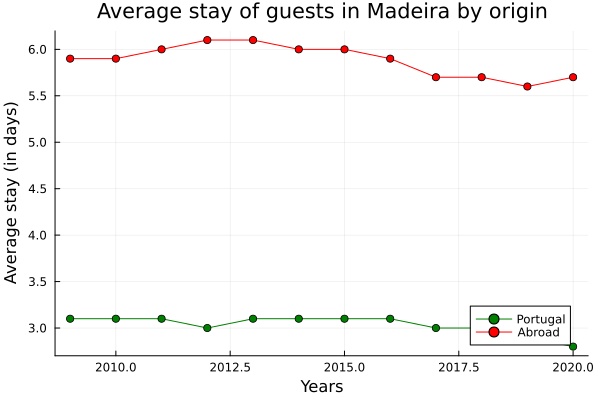

In [59]:
ylabel!("Average stay (in days)")

4.5. Finally, set the axis ranges and the corresponding ticks with `xaxis!()` and `yaxis!()`.

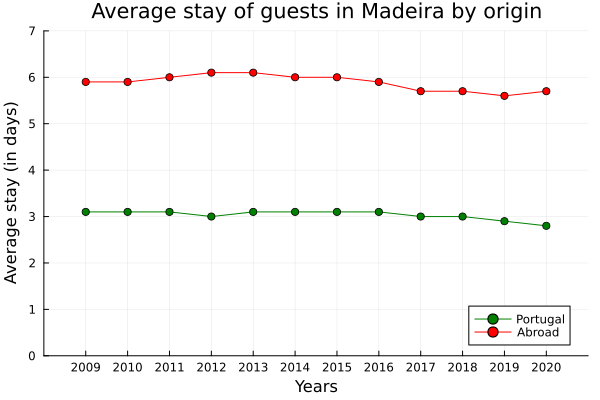

In [60]:
xaxis!((2008, 2021), 2009:2020)
yaxis!((0, 7))

## Subplots

Now we generate subplots with `plot()`. This time composed plot variables as arguments followed by a `layout` argument representing the dimensions of the plot (in this case we will have `(1,2)`, meaning 1 line of 2 columns). Optionally, the `size` argument represents the size of the figure.

Example:

```julia
plot(plot1, plot2, layout=(1,2), size=(750,500))
```

### Exercise 5 - Subplots

5.1. Generate a plot with `income_plot` and `avg_stay_plot` as subplots. Have the titles removed (assign `title` to an empty string).

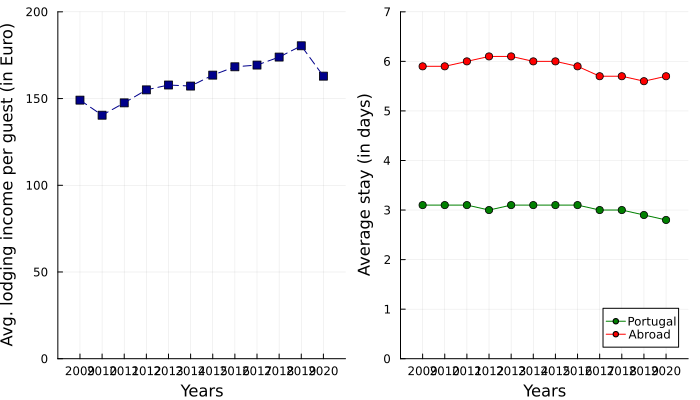

In [61]:
plot(income_plot, avg_stay_plot, layout=(1,2), size=(700, 400), title="")

5.2. Reassign the x-axis ticks to every 2 years instead of every year with `xaxis!()`.

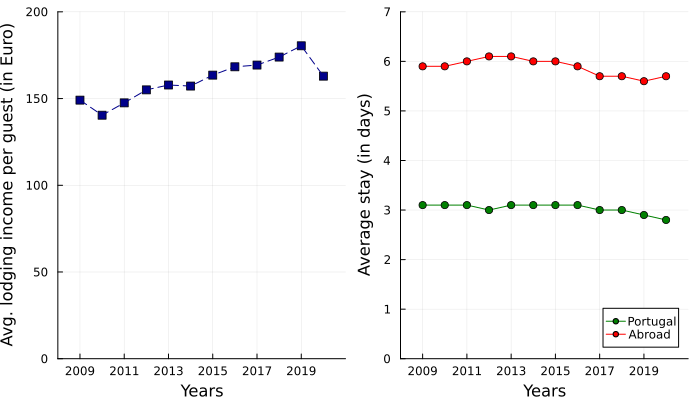

In [62]:
xaxis!((2008, 2021), 2009:2:2020)

You can save this plot with `savefig()` or `png()`.

```julia
savefig(file_name) # Saves the most recent figure
savefig(plot_reference, file_name) # Specifies which plot to save

png(file_name) # Saves the most recent figure
png(plot_reference, file_name) # Specifies which plot to save
```

The supported formats with the corresponding backends are as follows:

| format | backends                                           |
|--------|----------------------------------------------------|
| eps    | inspectdr, plotlyjs, pyplot                        |
| html   | plotly, plotlyjs                                   |
| json   | plotly, plotlyjs                                   |
| pdf    | gr, inspectdr, pgfplotsx, plotlyjs, pyplot, gaston |
| png    | gr, inspectdr, pgfplotsx, plotlyjs, pyplot, gaston |
| ps     | gr, pyplot                                         |
| svg    | gr, inspectdr, pgfplotsx, plotlyjs, pyplot, gaston |
| tex    | pgfplotsx                                          |
| text   | hdf5, unicodeplots                                 |

5.3. Save your subplot.

In [63]:
savefig("subplot.pdf")

"/home/andre/Programming/Julia/programming-in-julia-for-the-digital-humanities/course/current/P01S02-working-with-data/notebooks/subplot.pdf"